In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ghibtools as gh
import seaborn as sns

from params import patients

In [15]:
def get_resp_features():
    concat = []
    for patient in patients:
        df = pd.read_excel(f'../df_analyse/resp_features_{patient}.xlsx', index_col = 0)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all

In [16]:
df_resp = get_resp_features()

In [49]:
df_resp[(df_resp['inspi_time'] > 30) & (df_resp['expi_time'] < 40)]

,patient,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude
10,P1,10,7739,8010,30.230469,31.289062,3.003906,1.058594,1.945312,0.332900,6.621435,-9.500260,20.613383,9.452518,11.160865
11,P1,11,8508,8801,33.234375,34.378906,3.093750,1.144531,1.949219,0.323232,5.600673,-9.349028,20.538327,8.839575,11.698753
12,P1,12,9300,9556,36.328125,37.328125,2.875000,1.000000,1.875000,0.347826,5.789560,-8.724233,19.239578,9.066748,10.172830
8,P2,8,7688,8070,30.031250,31.523438,3.578125,1.492188,2.085938,0.279476,-4.927822,-27.960453,26.102216,9.490455,16.611761
9,P2,9,8604,8980,33.609375,35.078125,3.394531,1.468750,1.925781,0.294591,-5.524647,-25.676260,26.016618,9.555868,16.460749
10,P2,10,9473,9869,37.003906,38.550781,4.789062,1.546875,3.242188,0.208809,-4.890566,-31.103040,26.667632,9.593298,17.074334
9,P3,9,8431,8784,32.933594,34.312500,3.507812,1.378906,2.128906,0.285078,26.768712,-19.545271,52.684102,29.892552,22.791550
10,P3,10,9329,9695,36.441406,37.871094,3.019531,1.429688,1.589844,0.331177,27.902178,-20.239713,53.829016,29.663382,24.165634
7,P4,7,8219,8572,32.105469,33.484375,3.242188,1.378906,1.863281,0.308434,74.678189,44.923546,106.777948,63.466940,43.311008
8,P4,8,9049,9367,35.347656,36.589844,3.664062,1.242188,2.421875,0.272921,68.401351,66.872994,105.218228,61.938361,43.279867


In [17]:
df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq']]

/tmp/ipykernel_20117/1337650542.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq']]


insp_duration     1.394436
exp_duration      2.514273
cycle_duration    3.908709
cycle_freq        0.265407
dtype: float64

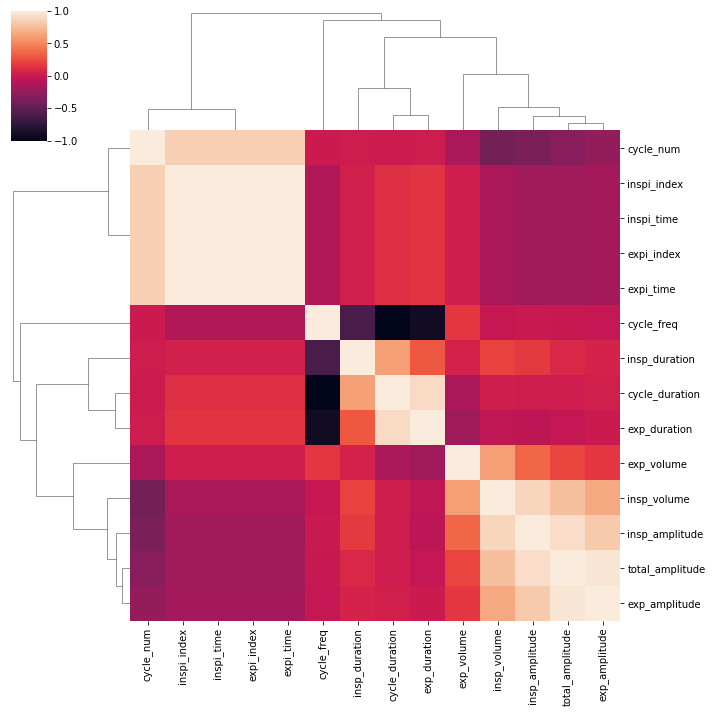

In [18]:
sns.clustermap(df_resp.corr('spearman'))

In [19]:
def get_spindles_features():
    df = pd.read_excel(f'../df_analyse/spindles_all_patients.xlsx', index_col = 0)
    return df

In [20]:
df_spindles = get_spindles_features()

In [23]:
df_spindles.mean()[['Duration','Frequency']]

/tmp/ipykernel_20117/3536899752.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_spindles.mean()[['Duration','Frequency']]


Duration      0.860505
Frequency    13.384036
dtype: float64

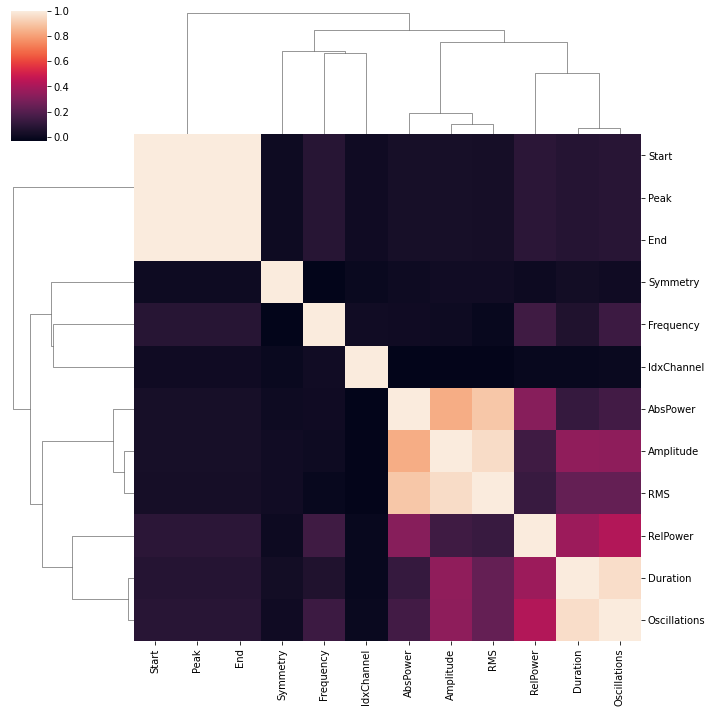

In [24]:
sns.clustermap(df_spindles.corr('spearman'))

In [45]:
def get_staging_comparison_features():
    concat = []
    for patient in patients:
        ser = pd.read_excel(f'../df_analyse/win_staging_{patient}.xlsx').T.loc['win',:].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = [0,1])
    return df_all

In [46]:
get_staging_comparison_features().mean()

0    0.649249
1    0.350751
dtype: float64

In [27]:
def get_spindle_cycle_features():
    concat = []
    for patient in patients:
        ser = pd.read_excel(f'../df_analyse/cycles_numbers_{patient}.xlsx').iloc[:,1].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = ['patient','all','spindled', 'unspindled'])
    return df_all

In [28]:
get_spindle_cycle_features()

,patient,all,spindled,unspindled
0,P1,2348,834,1514
1,P2,2334,851,1483
2,P3,2157,969,1188
3,P4,2053,916,1137
4,P5,1602,706,896
5,P6,1235,380,855
6,P7,2471,1440,1031
7,P8,753,295,458
8,P9,1451,472,979
9,P10,1689,755,934
